# FMSF50/MASB13/MASL01 VT-25 Datorlaboration 2: Centrala gränsvärdessatsen, konfidensintervall och test - Python
# 1. Introduktion
## 1.1 Syfte
Syftet med dagens laborationen är att du skall:
* Få förståelse för hur och när centrala gränsvärdessatsen kan användas,
* bli mer förtrogen med konfidensintervall,
* bli mer förtrogen med hypotestest,
* undersöka sambandet mellan konfidensintervall och hypotestest,
* bli mer förtrogen med styrkefunktion,
* använda styrkefunktionen för att konstruera en försöksplan,

## 1.2 Förberedelser
* Gör *Inför Datorlaboration 2: förberedelser* i Canvas.
* Öppna denna .ipynb-fil i antingen *Google Colabs* eller *Visual Studio Code*.



## 1.3 Ladda ner (och upp) lab-filer

Utöver samma Python-moduler som i Datorlaboration 1 använder laborationen datamaterialet i **vindelälven_årsmax.csv** och två specialskrivna funktioner, **skattningar.py** och **styrkefkn.py**.
* Ladda ner filerna från Canvas.
* *Om du använder Colabs*:
    1. Klicka på mappen *Filer* till vänster i *google colab* menyn.
    2. Ladda upp filerna genom att klicka på *Ladda upp till sessionens lagringsutrymme* (eller drag-n-drop filen).
* *Om du använder Python lokalt på datorn*:
    1. Lägg filerna i samma mapp som denna .ipynb-fil.


## 1.4 Python-paket
Vi kommer använda följande paket i Python:

* **numpy** Grundläggande linjär algebra och numerik.
* **scipy.stats** För beräkningar av täthets- och fördelningsfunktioner.
* **pandas** För datahantering.
* **matplotlib.pyplot** Grundläggande plot-funktioner.
* **seaborn** Bättre plot-funktioner för pandas-objekt.

Börja med att importera Python-paketem (om du inte använder *colabs* kan du behöva installera paketen först). Vi behöver också importera de extra funktionerna från de extra Python-filerna.

Kör kodblocket nedan interaktivt med *Execute-Cell*, den lilla *Play*-ikonen till vänster om kodblocket, eller med *Ctrl-Alt-Enter*.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from skattningar import skattningar
from styrkefkn import styrkefkn


# 2. Årsmaximum i Vindelälven

I filen **vindelälven_årsmax.cvs** har vi årliga maximala dygnsflödet (kubikmeter per sekund) i Vindelälven under perioden 1911-1939 och 1980-2022. Läs in datamaterialet som en pandas dataframe med *read_csv()* från pandas-paketet och spara den som objektet **vindelmax** och skriv ut det på skärmen:

In [11]:
vindelmax = pd.read_csv("vindelälven_årsmax.csv")
print(vindelmax)

      år  maxflöde
0   1911       856
1   1912       712
2   1913       886
3   1914       732
4   1915       652
..   ...       ...
67  2018      1530
68  2019       872
69  2020       988
70  2021       797
71  2022      1158

[72 rows x 2 columns]


Data består av två kolumner
* **år**: vilket år mätningen är gjord,
* **maxflöde**: det högsta dygnsmedelflödet under året ($m^3$/s).

## 2.1 Enkel sammanfattning
Gör lite sammanfattande beräkningar genom att lägga till pandas-funktionen *.describe()* till dataframen:

In [ ]:
print(vindelmax.describe())

Vi vill skatta väntevärdet av årsmaximum och beräkna ett konfidensintervall för det. Vi vill också testa hypoteser om det förväntade värdet. För att kunna göra det behöver vi ta reda på fördelningen för skattningen. Vi kan bara beräkna konfidensintervall med hjälp av normalfördelade skattningar (i denna kursen). 

Om maxflödet kan antas vara normalfördelat så är ju medelvärdet också normalfördelat. Tyvärr det är fråga om maxvärden så man kan misstänka att det passar bättre med Gumbelfördelning, *gumbel_r*. Frågan är vad som i så fall händer med fördelningen för medelvärdet av maxvärdena.

## 2.2 Parameterskattningar

Vi börjar med att, på samma sätt som i Datorlaboration 1, undersöka om maxflödet kan antas vara normal- eller Gumbelfördelat.

Normalfördelningen har fördelningsfunktion

$F_X(x) = \Phi(\frac{x-\mu}{\sigma})$ för $-\infty < x < \infty$

med en lägesparameter $\mu = E(X)$ och en skalparameter $\sigma = D(X)$.

Gumbelfördelningen, se extramaterialet, har fördelningsfunktion

$F_X(x)=e^{-e^{(x-a)/b}}$ för $-\infty < x < \infty$

med lägesparameter $a$ och skalparameter $b$ med väntevärde $E(X) = a + \gamma b$ och varians $V(X) = b^2\pi^2/6$, där $\gamma \approx 0.57722$ är Eulers konstant.

Börja med att skatta alla fyra parametrarna. För normalfördelningen kan vi igen använda *mean()* och *std()*. För Gumbelfördelning behöver vi använda *gumbel_r.fit()*:

In [12]:
m = vindelmax.maxflöde.mean()
s = vindelmax.maxflöde.std()
print("Medelvärde x-streck =", m, "; Standardavvikelse s =", s)
a, b = stats.gumbel_r.fit(vindelmax.maxflöde)
print("Läge a =", a, "; Skala b =", b)

Medelvärde x-streck = 922.125 ; Standardavvikelse s = 257.28320218537505
Läge a = 804.963725147903 ; Skala b = 204.3695131392677


**Mozquizto 1:** Skatta parametrarna $\mu$ och $\sigma$ i normalfördelningen.

**Mozquizto 2:** Skatta parametrarna $a$ och $b$ i Gumbelfördelningen.

Eulers konstant $\gamma$ och $\pi$ finns i **numpy** som konstanterna *np.euler_gamma* respektive *np.pi*.

**Mozquizto 3:** Skatta väntevärdet $E(X)$ och standardavvikelsen $D(X)$ för Gumbelfördelningen med hjälp av skattningarna av $a$ och $b$.

In [13]:
# Ersätt ? med något lämpligt
EX_gumb = a + np.euler_gamma*b
DX_gumb = b*np.pi/np.sqrt(6)
print("E(X) =", EX_gumb, ", D(X) =", DX_gumb)

E(X) = 922.929009560188 , D(X) = 262.11408436703067


## 2.3 Fördelningsanpassning
Vi undersöker nu vilken fördelning som passar bäst till årsmaximum, Normal eller Gumbel:

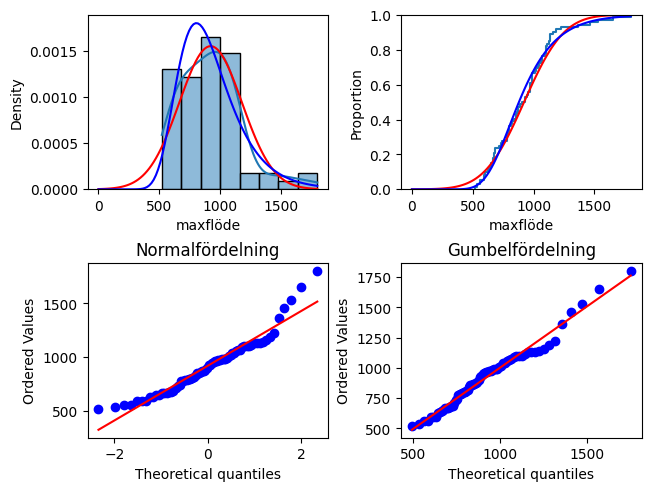

In [14]:

fig, axs = plt.subplots(2, 2, constrained_layout = True)
sns.histplot(vindelmax, x = "maxflöde", stat = "density", kde = True, ax = axs[0,0])
sns.ecdfplot(vindelmax, x = "maxflöde", ax = axs[0,1])
stats.probplot(vindelmax.maxflöde, dist = "norm", fit = True, plot = axs[1,0])
stats.probplot(vindelmax.maxflöde, dist = stats.gumbel_r, sparams = (a, b), fit = True, plot = axs[1,1])

axs[1,0].set_title("Normalfördelning")
axs[1,1].set_title("Gumbelfördelning")

#konstruera en vektor med 100 värden från 0 till största flöde (för att få snygga värden)
x = np.linspace(0, max(vindelmax.maxflöde), 100)

#beräkna normal- och Gumbeltätheter med de skattade parametrarna
p_normal = stats.norm.pdf(x, m, s)
p_gumb = stats.gumbel_r.pdf(x, a, b)
#och fördelningsfunktioner med de skattade parametrarna
F_normal = stats.norm.cdf(x, m, s)
F_gumb = stats.gumbel_r.cdf(x, a, b)

#lägg till dem till figuren
axs[0,0].plot(x, p_normal, 'r')
axs[0,0].plot(x, p_gumb, 'b')
axs[0,1].plot(x, F_normal, 'r')
axs[0,1].plot(x, F_gumb, 'b')


**Uppgift:** Vilken av fördelningarna passar bäst?

Maximum likelihood-metoden, som används för att beräkna $a$- och $b$-skattningarna, beskrivs i Kapitel 7.4 men ingår inte i kursen. Skattningarna i Gumbel-fallet går dessutom inte att skriva upp analytiskt utan de behöver beräknas iterativt och deras varianser är komplicerade. Vi kan alltså inte utnyttja dem för att beräkna konfidensintervall eller test för väntevärdet.

Vi får istället hoppas att antalet observationer är tillräckligt stort för att medelvärdet ska vara approximativt normalfördelat, även om värdena själva inte är det.

# 3. Centrala gränsvärdessatsen

Enligt Centrala gränsvärdessatsen vet vi att summan $\sum X_i$, och därmed också medelvärdet $\bar{X}$, blir ungefär normalfördelat om vi summerar tillräckligt många oberoende variabler från samma fördelning; **oavsett** vilken fördelning $X_i$ har. 

## 3.1 Medelvärden av exponentialvariabler
Vi undersöker först hur CGS fungerar för medelvärdet av exponentialfördelade variabler. Vi använder medelvärdet av maxflödena som skalparameter. Tillägget *.rvs()* ger slumptal, **R**andom **V**alue **S**ample, från en given fördelning.

Vi börjar med att simulera $M=1000$ stickprov med $n=2$ observationer i varje. Det innebär $n*M$ slumptal som vi sedan transformerar till en $n\times M$-matris med *.reshape()*. Varje kolumn innehåller då ett stickprov med en observation i varje rad.

Sedan beräknar vi medelvärdet av de $n$ observationerna i varje kolumn genom att lägga till **axis = 0** till *mean()*.

Sedan ritar vi
*  ett histogram, *histplot()*, över de $M$ observationerna i första raden för att se hur exponentialfördelningen ser ut, 
*  ett histogram över de $M$ medelvärdena med egen skala på x-axeln för att se hur fördelningens form skiljer sig från observationernas,
*  ett histogram över de $M$ medelvärdena med samma skala på x-axeln som för observationerna för att se hur spridningen minskar,
*  ett normalfördelningspapper, *probplot()*, för medelvärdena för att se om de är ungefär normalfördelade:

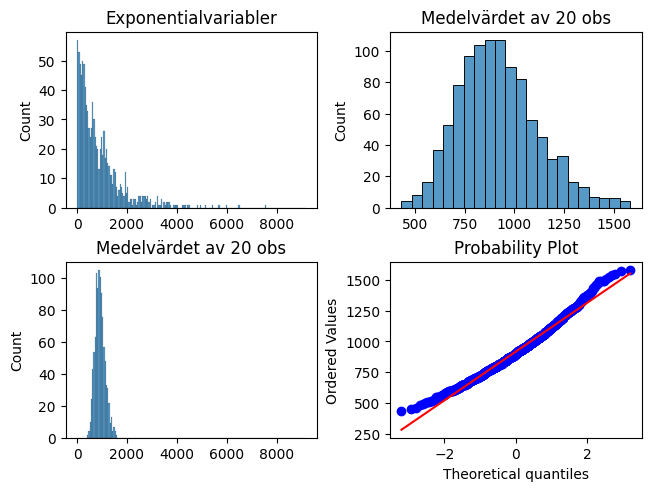

In [11]:
n = 20      # antal observationer i stickprovet
M = 1000        # antal simulerade stickprov
x = stats.expon.rvs(scale = m, size = n*M)   # simulera n*M st exponential
x = x.reshape((n, M))                   # n x M-matris. x1 i första raden, xn i sista.
xmedel = x.mean(axis = 0)                # M st medelvärden

#definiera en gemensam binrange för jämförelse
binrange = (0, np.max(x))
#subplots
fig, axs = plt.subplots(2, 2, constrained_layout = True)
# histogram över de Mst x[0,:]-värdena
sns.histplot(x[0,:], binwidth = 50, binrange = binrange, ax = axs[0,0])
axs[0,0].set_title('Exponentialvariabler')
# histogram över de Mst x-medelvärdena i samma skala som för x
sns.histplot(xmedel, binwidth = 50, binrange = binrange, ax = axs[1,0])
axs[1,0].set_title('Medelvärdet av ' + str(n) + ' obs')
# histogram över de Mst x-medelvärdena i fri skala
sns.histplot(xmedel, ax = axs[0,1])
axs[0,1].set_title('Medelvärdet av ' + str(n) + ' obs')
# kvantilplot av medelvärdena för att undersöka normalfördelning
fig = stats.probplot(xmedel, dist = "norm", fit = True, plot = axs[1,1])

**Uppgift:** Testa med olika värden på $n$. Hur stort behöver stickprovet vara innan medelvärdet blir ungefär normalfördelat?

## 3.2 Medelvärden av Gumbelvariabler

Undersök nu hur medelvärdet av Gumbelfördelade slumpvariabler beter sig. Använd parameterskattningarna du fick tidigare:

In [8]:
n = 2       # antal termer i medelvärdet
M = 1000        # antal simuleringar
x = stats.gumbel_r.rvs(a, b, size = n*M)   # simulera exponential
x = x.reshape((n,M))                   # n x M-matris. x1 i första raden, xn i sista.
xmedel = x.mean(axis = 0)                # M st medelvärden

#definiera en gemensam binrange för jämförelse
binrange = (0, np.max(x))
#subplots
fig, axs = plt.subplots(2, 2, constrained_layout = True)
# histogram över de Mst x[0,:]-värdena
sns.histplot(x[0,:], binwidth = 50, binrange = binrange, ax = axs[0,0])
axs[0,0].set_title('Gumbelvariabler')
# histogram över de Mst x-medelvärdena i samma skala som för x
sns.histplot(xmedel, binwidth = 50, binrange = binrange, ax = axs[1,0])
axs[1,0].set_title('Medelvärde av ' + str(n) + ' obs')
# histogram över de Mst x-medelvärdena i fri skala
sns.histplot(xmedel, ax = axs[0,1])
axs[0,1].set_title('Medelvärde av ' + str(n) + ' obs')
# kvantilplot av medelvärdena för att undersöka normalfördelning
fig = stats.probplot(xmedel, dist = "norm", fit = True, plot = axs[1,1])

NameError: name 'a' is not defined

**Uppgift:** Testa med olika värden på $n$. Hur stort behöver stickprovet vara innan medelvärdet blir ungefär normalfördelat?

**Uppgift:** Behövs det större eller mindre stickprov innan det är normalfördelat, jämfört med exponentialfördelningen? Verkar $n=72$ observationer vara tillräckligt många?

Vi kan alltså undersöka väntevärdet i Gumbelfördelningen genom att skatta väntevärdet med medelvärdet $\bar{x}$ och utnyttja att $n=72$ är så stort att medelvärdet $\bar{X}$ är approximativt normalfördelat.

# 4. Inferens för årsmaximum
## 4.1 Konfidensintervall för väntevärdet av årsmaximum

**Mozquizto 4:** Hur beräknas ett konfidensintervall för $\mu$ när $\sigma$ är känt? När $\sigma$ är okänt?

Skatta väntevärde och standardavvikelse för årsmaximum med $\bar{x}$ och $s$, som du beräknade tidigare (**m** och **s**) och beräkna ett 95\% konfidensintervall för väntevärdet $\mu$. Beräkna kvantilen med hjälp av inversen till fördelningsfunktionen för $t$-fördelningen med funktionen *stats.t.ppf()*.

In [15]:
# Ersätt ? med något lämpligt och avkommentera rätt intervall.
alfa = 0.005
n = vindelmax.shape[0]
f = n - 1
d = s/np.sqrt(n)
tkvantil = stats.t.ppf(alfa, f)
#print('I_my = (', m - tkvantil*d, ',',  np.inf, ')')
print('I_my = (', m - tkvantil*d, ',',  m + tkvantil*d, ')')
#print('I_my = (', 0, ',',  m + tkvantil*d, ')')

I_my = ( 1002.3808539482933 , 841.8691460517067 )


**Uppgift:** Fundera på varför undre gränsen, i detta fallet, bör vara noll, inte $-\infty$, i ett ensidigt, uppåt begränsat konfidensintervall.

**Mozquizto 5:** Beräkna ett konfidensintervall med konfidensgrad $1-\alpha$ för väntevärdet av årsmaxflödet.

## 4.2 Hypotestest för väntevärdet av årsmaximum
Vi kan använda konfidensintervallet för att testa om förväntade årsmaximum kan vara 1000$m^3$/s, mot någon lämplig mothypotes.

**Mozquizto 6:** Ange mothypotes och slutsats för det test som konfidensintervallet motsvarar.

Eftersom vi kan beräkna fördelningsfunktionen för en t-fördelning med *stats.t.cdf()*  kan vi också använda Direktmetoden och beräkna P-värdet för testet.

In [19]:
# Ersätt = med något lämpligt och avkommentera rätt P-värde
my0 = 1000
print('H0: my =', my0)
T = (m - my0)/d
print(m, f, d)
print('T =', T)
print('P-värde =', 2*(1 - stats.t.cdf(abs(T), f)))
print('P-värde =', stats.t.cdf(T, f))
print('P-värde =', 1 - stats.t.cdf(T, f))


H0: my = 1000
922.125 71 30.321116158444713
T = -2.5683421280753573
P-värde = 0.012323163132813564
P-värde = 0.006161581566406816
P-värde = 0.9938384184335932


**Mozquizto 7:** Beräkna teststorheten och P-värdet.

**Uppgift:** Experimentera med lite olika värden på **my0**. Vilka värden kan förkastas? Hur hänger det ihop med gränserna i konfidensintervallet?

# 5. Skattningars egenskaper

Vi ska nu försöka få en uppfattning om hur punkt- och intervallskattningar fungerar. Vi studerar därför ett simuleringsexempel med normalfördelad data.

## 5.1 Punktskattningar
Antag att vi har ett stickprov $x_1, \ldots, x_n$ från $X_i \in \text{N}(\mu,\sigma)$. En lämplig skattning av det okända väntevärdet $\mu$ är ju $\mu^\ast = \bar{X} \in N(\mu,\,\sigma/\sqrt{n})$. En viktig fråga är hur bra skattningen blir för olika värden på $n$ och $\sigma$. Den specialskrivna Python-funktionen *skattningar()* simulerar 1000 olika stickprov, av två olika storlekar, och jämför skattningarna med det sanna värdet. Låt oss se vad som händer om vi har $n_1=5$ eller $n_2=25$ observationer med sant $\mu=$**m** och $\sigma=$**s**.

In [20]:
help(skattningar)

Help on function skattningar in module skattningar:

skattningar(mu=0, sigma=1, n=(10, 100), alternativ='muskatt')
        skattningar Illustrerar mu och sigma^2-skattning samt konfidensintervall

        Ritar histogram for mu- och sigma^2-skattning eller illustrerar
        konfidensintervall for mu. Skattningarna baseras på n[0] respektive n[1]
        observationer fran en normalfördelning, N(mu, sigma).

        Parameters
        ----------
        mu : real number, optional
                Väntevärde i normalfördelningen. The default is 0.
        sigma : positive number, optional
                Standardavvikelse i normalfördelningen. The default is 1.
        n : Two positive integers in tuple or array, optional
                Antal observationer att simulera i de två stickproven. Gör det möjligt
                att jämföra hur skattningarna beter sig med olika antal observationer.
                The default is (10,100).
        alternativ : string, optional
                

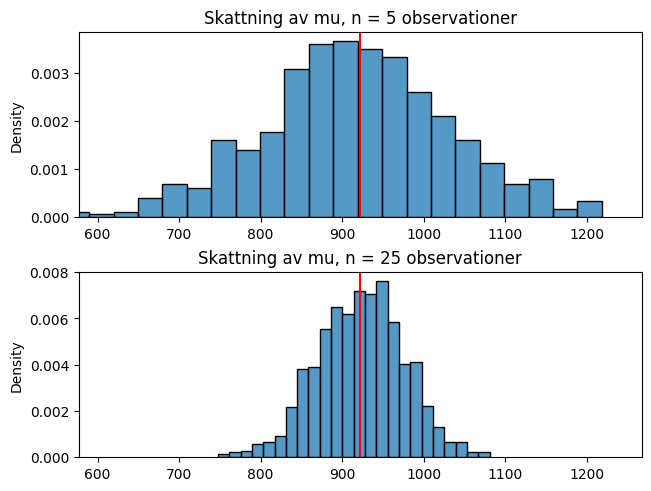

In [21]:
fig = skattningar(mu = m, sigma = s, n = (5, 25), alternativ = 'muskatt')

**Uppgift:** Använd funktionen för att undersöka vad som händer när antalet observationer, $n$, och osäkerheten, $\sigma$, ändras.

## 5.2 Intervallskattningar

Med rutinen *skattningar()* kan vi också illustrera de konfidensintervall för $\mu$ som våra 1000 stickprov genererar. Intervallet för $\mu$ ges ju av (känt $\sigma$)

$I_\mu = \mu^\ast \pm \lambda_{\alpha/2} \cdot D(\mu^\ast) = \mu^\ast \pm \lambda_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$

För att plotta 100 st 95% konfidensintervall baserade på $n_1=5$ respektive $n_2=25$ observationer med $\mu=$**m** och $\sigma=$**s** kan vi använda **alternativ = "konfint"**:

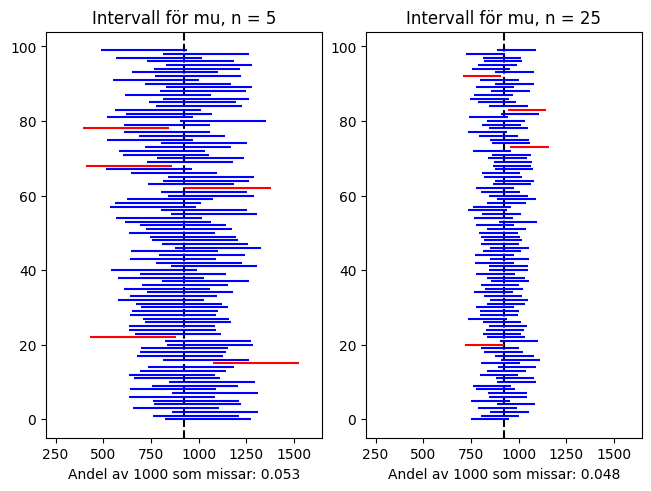

In [22]:
fig = skattningar(mu = m, sigma = s, n = (5, 25), alternativ = 'konfint')

**Uppgift:** Använd rutinen för att undersöka vad som händer när antalet observationer, $n$, och osäkerheten, $\sigma$, ändras. Ändras antalet intervall som **inte** innehåller rätt värde på $\mu$ (de röda intervallen)?

**Mozquizto 8:** Beräkna det förväntade antalet intervall som inte innehåller $\mu$, för något värde på $n$ och konfidensgraden $1-\alpha$.

Förväntat antal = Figure(640x480)


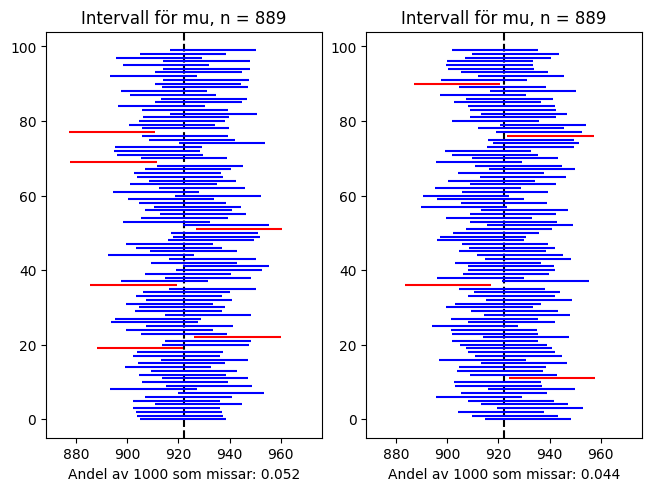

In [24]:
# Ersätt ? med lämpligt beräkning
förväntatantal = skattningar(mu = m, sigma = s, n = (889, 889), alternativ="konfint")
print('Förväntat antal =', förväntatantal)

# 6. Hypotesprövning
## 6.1 Styrkefunktion för normalfördelningar med känt $\sigma$
Funktionen *styrkefkn()* illustrerar styrkefunktionen

$h(\mu) = P(\text{förkasta $H_0$ om $\mu$ är det rätta värdet})$

för test av nollhypotesen $H_0$: $\mu = \mu_0$ om observationerna är $X_i \in \text{N}(\mu,\sigma)$ med känd standardavvikelse $\sigma$ och $\mu^\ast = \bar{x}$.

In [ ]:
help(styrkefkn)

Använd funktionern för att illustrera $h(\mu)$ vid ett test av $H_0$: $\mu = 1000$ mot $H_1$: $\mu \neq 1000$ på signifikansnivån $\alpha=0.05$ med $n=10$ observationer och $\sigma=$**s**.

Med **riktning='!='** får vi styrkefumktionen för ett tvåsidigt test:

In [ ]:
fig = styrkefkn(mu0 = 1000, sigma = s, n = 10, alpha = 0.05, riktning = '!=')

**Uppgift:** Hur påverkas styrkefunktionen av antalet observationer, $n$, standardavvikelsen, $\sigma$, och konfidensgraden, $\alpha$?


Vi kan få ett ensidigt test alternativen **riktning='<'** eller **'>'** istället.

**Mozquizto 9:** Undersök hur styrkan ser ut för ensidiga test. För vilka värden blir $h(\mu)$ stor eller liten, verkar det rimligt?

Genom att ange ytterligare en parameter, **mu_sant**, beräknas styrkan i punkten **mu_sant** och illustrerar regionerna för typ 1 och typ 2 fel.


In [ ]:
fig = styrkefkn(mu0 = 1000, sigma = s, n = 72, alpha = 0.05, riktning = '<', mu_sant = 950)  #styrkefunktionen i 950, dvs h(950)

**Uppgift:** Vad illustrerar det blå respektive röda området i den undre figuren?

**Uppgift:** Experimentera med olika värden på $n$, $\alpha$ och **mu_sant** för att se vad som händer med styrkan.

**Mozquizto 10:** Hur stort måste $n$ minst vara för att sannolikheten att upptäcka att $\mu<1000$ ska bli minst 80%, om det sanna värdet är 950, för ett test med signifikansnivå $\alpha$?

## 6.2 Styrkefunktion för normalfördelning med okänt $\sigma$

I de flesta praktiska situationer känner vi inte $\sigma$ utan den måste skattas med $\sigma^\ast = s = \sqrt{Q/f}$ där $Q$ är en summa av kvadratavvikelser och $f$ är dess frihetsgrader. När vi bara har ett stickprov är $Q=\sum_{i=1}^{n} (x_i - \bar{x})^2$ och $f = n-1$.

Vi kan använda funktionen *skattningar()* till att illustrera hur mycket skattningen $s^2$ av variansen $\sigma^2$ kan variera för två olika stickprovsstorlekar, genom alternativet **sigmaskatt**:

In [ ]:
fig = skattningar(mu = m, sigma = s, n = (25, 72), alternativ = "sigmaskatt")

**Uppgift:** Experimentera och se vad som händer när $n$ ändras.

Detta gör att teststorheten 

$T = \frac{\mu^\ast - \mu_0}{d(\mu^\ast)}=\frac{\mu^\ast-\mu_0}{s/\sqrt{n}}$

blir $t(n-1)$-fördelad istället för $N(0,1)$-fördelad när $H_0$ är sann. Den kommer då att variera mer än tidigare, eftersom $s$ i nämnaren också varierar slumpmässigt. Det gör det besvärligare att beräkna styrkan.

I allmänhet kan styrkan (d.v.s. $h(\mu)$ när $\mu \neq \mu_0$) beräknas med hjälp av en icke-central $t$-fördelning med $f=n-1$ frihetsgrader och centreringsparameter $\Delta = \tfrac{\mu_1 - \mu_0}{\sigma/\sqrt{n}}$. Den intresserade kan läsa mer på [wikipedia](https://en.wikipedia.org/wiki/Noncentral_t-distribution).

**Slut på Datorövning 2**